In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [6]:
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns',8000)
pd.set_option('display.max_rows',7000)

In [7]:
from google.colab import files
files.upload()

Saving test (1).csv to test (1).csv
Saving train (1).csv to train (1).csv


In [172]:
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test (1).csv')

In [175]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [11]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,Piano,52f6dd16c,147d704e4,8d857a0a1,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,Bassoon,691ebeae8,8653dcc2e,67a8d4ebb,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,Theremin,81f792c16,6cdda499e,69403e18c,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,Bassoon,c9134205b,acbca4827,cb681246b,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,Theremin,f0f100f57,6f800b9af,cd9feb5c6,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [13]:
train.shape

(600000, 25)

In [18]:
(train.isnull().sum()/train.shape[0])*100

bin_0     2.982333
bin_1     3.000500
bin_2     2.988333
bin_3     3.002333
bin_4     3.007833
nom_0     3.042000
nom_1     3.026000
nom_2     3.005833
nom_3     3.020167
nom_4     3.005833
nom_5     2.963000
nom_6     3.021833
nom_7     3.000500
nom_8     2.959167
nom_9     3.012167
ord_0     3.048000
ord_1     3.006833
ord_2     3.012500
ord_3     2.986000
ord_4     2.988333
ord_5     2.952167
day       2.992000
month     2.998000
target    0.000000
dtype: float64

In [16]:
(test.isnull().sum()/test.shape[0])*100

id       0.00000
bin_0    2.97525
bin_1    3.00950
bin_2    2.99300
bin_3    2.98775
bin_4    2.98775
nom_0    3.01550
nom_1    2.98675
nom_2    3.04475
nom_3    3.04400
nom_4    2.99825
nom_5    2.97800
nom_6    3.00300
nom_7    3.00075
nom_8    2.98900
nom_9    3.01500
ord_0    2.97325
ord_1    3.04175
ord_2    3.02625
ord_3    3.01325
ord_4    2.98325
ord_5    3.01175
day      3.00625
month    2.99600
dtype: float64

In [17]:
train=train.drop(labels='id', axis=1)

In [33]:
train.nunique()

bin_0        2
bin_1        2
bin_2        2
bin_3        2
bin_4        2
nom_0        3
nom_1        6
nom_2        6
nom_3        6
nom_4        4
nom_9     2218
ord_0        3
ord_1        5
ord_2        6
ord_3       15
ord_4       26
ord_5      190
day          7
month       12
target       2
dtype: int64

In [32]:
test.nunique()

id       400000
bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_9      2216
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       190
day           7
month        12
dtype: int64

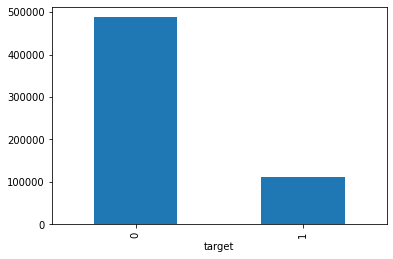

In [26]:
train.groupby('target').size().plot(kind='bar')

In [30]:
train[['nom_7','nom_8']]

,nom_7,nom_8
0,598080a91,0256c7a4b
1,1dddb8473,52ead350c
2,5ddc9a726,745b909d1
3,3a33ef960,bdaa56dd1
4,bc9cc2a94,NaN
...,...,...
599995,a7059911d,158183c63
599996,83bdea3a5,e9fde8fa8
599997,114b1dbf3,cccbca824
599998,fba315672,4164322bd


In [36]:
#drop_cols=['nom_5','nom_6','nom_7','nom_8']
drop_cols_1=['nom_9']
train=train .drop(labels=drop_cols_1, axis=1)
test=test.drop(labels=drop_cols_1, axis=1)

In [37]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [45]:
categorical_col=[]
numerical_cols=[]
Target='target'

for col in train.columns:
  if((train[col].nunique()<=15) & (col != Target)):
    categorical_col.append(col)
  else:
    numerical_cols.append(col)

In [46]:
categorical_col

['bin_0',
 'bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'ord_0',
 'ord_1',
 'ord_2',
 'ord_3',
 'day',
 'month']

In [49]:
numerical_cols.remove('target')
numerical_cols

['ord_4', 'ord_5']

In [50]:
train. shape

(600000, 19)

In [51]:
test.shape

(400000, 19)

In [53]:
y=train[['target']].values
train=train.drop(labels='target', axis=1)
frame=train.append(test)

In [55]:
frame.nunique()

bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       190
day           7
month        12
id       400000
dtype: int64

In [65]:
(frame.isnull(). sum()/frame.shape[0])*100


bin_0    0.0
bin_1    0.0
bin_2    0.0
bin_3    0.0
bin_4    0.0
nom_0    0.0
nom_1    0.0
nom_2    0.0
nom_3    0.0
nom_4    0.0
ord_0    0.0
ord_1    0.0
ord_2    0.0
ord_3    0.0
ord_4    0.0
ord_5    0.0
day      0.0
month    0.0
dtype: float64

In [58]:
for col in categorical_col:
  Mod=frame[col].mode()[0]
  frame[col]=frame[col].fillna(Mod)

In [62]:
#id_values=test[['id']].values
#test=test.drop(labels=['id'], axis=1)
frame=frame.drop(labels='id', axis=1)

In [64]:
Mod_1=frame['ord_4'].mode()[0]
Mod_2=frame['ord_5'].mode()[0]
frame['ord_4']=frame['ord_4'].fillna(Mod_1)
frame['ord_5']=frame['ord_5'].fillna(Mod_2)

In [66]:
frame.dtypes

bin_0    float64
bin_1    float64
bin_2    float64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
ord_0    float64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day      float64
month    float64
dtype: object

In [74]:
frame.head(10)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,3.0,5.0,0.0,3.0,0.0,3.0,2.0,20.0,56.0,6.0,3.0
1,1.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,4.0,3.0,3.0,2.0,5.0,4.0,23.0,150.0,7.0,7.0
2,0.0,1.0,0.0,0.0,0.0,2.0,5.0,3.0,0.0,0.0,3.0,4.0,2.0,13.0,15.0,105.0,5.0,9.0
3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,3.0,1.0,4.0,4.0,0.0,2.0,21.0,3.0,3.0
4,0.0,0.0,0.0,1.0,0.0,2.0,5.0,3.0,2.0,3.0,3.0,2.0,1.0,7.0,2.0,50.0,5.0,12.0
5,0.0,0.0,1.0,1.0,0.0,2.0,5.0,4.0,1.0,0.0,2.0,1.0,3.0,1.0,16.0,180.0,3.0,4.0
6,0.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,2.0,0.0,1.0,2.0,1.0,2.0,17.0,158.0,5.0,6.0
7,0.0,0.0,1.0,1.0,0.0,2.0,5.0,0.0,3.0,0.0,3.0,1.0,1.0,1.0,24.0,54.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0,1.0,4.0,0.0,2.0,13.0,136.0,6.0,3.0
9,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,0.0,4.0,13.0,8.0,50.0,1.0,8.0


In [69]:
ordinal_cols=['bin_3','bin_4','nom_0','nom_1','nom_2','nom_3','nom_4','ord_1','ord_2','ord_3','ord_4','ord_5']
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
frame[ordinal_cols]=enc.fit_transform(frame[ordinal_cols])


In [73]:
frame.dtypes

bin_0    category
bin_1    category
bin_2    category
bin_3    category
bin_4    category
nom_0    category
nom_1    category
nom_2    category
nom_3    category
nom_4    category
ord_0    category
ord_1    category
ord_2    category
ord_3    category
ord_4    category
ord_5    category
day      category
month    category
dtype: object

In [72]:
for col in frame.columns:
  frame[col]=frame[col].astype('category')

In [75]:
frame['nom_3'].cat.codes 

0         5
1         4
2         0
3         3
4         2
         ..
399995    2
399996    5
399997    4
399998    2
399999    3
Length: 1000000, dtype: int8

In [76]:
df=np.stack([frame[col].cat.codes.values for col in frame.columns],1)
df=torch.tensor(df, dtype=torch.int64)
df[:10]

tensor([[  0,   0,   0,   0,   0,   2,   4,   3,   5,   0,   2,   0,   3,   2,
          20,  56,   5,   2],
        [  1,   1,   0,   0,   1,   2,   3,   0,   4,   3,   2,   2,   5,   4,
          23, 150,   6,   6],
        [  0,   1,   0,   0,   0,   2,   5,   3,   0,   0,   2,   4,   2,  13,
          15, 105,   4,   8],
        [  0,   0,   0,   0,   0,   2,   0,   3,   3,   3,   0,   4,   4,   0,
           2,  21,   2,   2],
        [  0,   0,   0,   1,   0,   2,   5,   3,   2,   3,   2,   2,   1,   7,
           2,  50,   4,  11],
        [  0,   0,   1,   1,   0,   2,   5,   4,   1,   0,   1,   1,   3,   1,
          16, 180,   2,   3],
        [  0,   0,   0,   0,   0,   2,   5,   3,   2,   0,   0,   2,   1,   2,
          17, 158,   4,   5],
        [  0,   0,   1,   1,   0,   2,   5,   0,   3,   0,   2,   1,   1,   1,
          24,  54,   0,   0],
        [  0,   0,   0,   0,   0,   0,   1,   3,   5,   1,   0,   4,   0,   2,
          13, 136,   5,   2],
        [  0,   0, 

In [77]:
output=torch.tensor(y).flatten()
output[:5]

tensor([0, 0, 0, 0, 0])

In [78]:
print(df.shape)
print(output.shape)

torch.Size([1000000, 18])
torch.Size([600000])


In [79]:
categorical_col_sizes=[len(frame[col].cat.categories) for col in frame.columns ]
categorical_emb_sizes=[(col_size, min(50, (col_size+1)//2)) for col_size in categorical_col_sizes]
print(categorical_emb_sizes)

[(2, 1), (2, 1), (2, 1), (2, 1), (2, 1), (3, 2), (6, 3), (6, 3), (6, 3), (4, 2), (3, 2), (5, 3), (6, 3), (15, 8), (26, 13), (190, 50), (7, 4), (12, 6)]


In [159]:
records=train.shape[0]
#train=df[:records]
test=df[records:]

In [83]:
print(train.shape)
print(test.shape)

torch.Size([600000, 18])
torch.Size([400000, 18])


In [88]:
X=train
y=output
print(X[:5])
print(y[:5])

tensor([[  0,   0,   0,   0,   0,   2,   4,   3,   5,   0,   2,   0,   3,   2,
          20,  56,   5,   2],
        [  1,   1,   0,   0,   1,   2,   3,   0,   4,   3,   2,   2,   5,   4,
          23, 150,   6,   6],
        [  0,   1,   0,   0,   0,   2,   5,   3,   0,   0,   2,   4,   2,  13,
          15, 105,   4,   8],
        [  0,   0,   0,   0,   0,   2,   0,   3,   3,   3,   0,   4,   4,   0,
           2,  21,   2,   2],
        [  0,   0,   0,   1,   0,   2,   5,   3,   2,   3,   2,   2,   1,   7,
           2,  50,   4,  11]])
tensor([0, 0, 0, 0, 0])


In [91]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [96]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [97]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [98]:
train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [141]:
EPOCHS = 20
BATCH_SIZE = 16
LEARNING_RATE = 0.007
NUM_FEATURES = 18
NUM_CLASSES = 2

In [142]:
from tqdm.notebook import tqdm

In [143]:
train_loader = DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [144]:
class MulticlassClassification(nn.Module):
  def __init__(self, num_feature, num_class):
      super(MulticlassClassification, self).__init__()
      self.layer_1 = nn.Linear(num_feature, 512)
      self.layer_2 = nn.Linear(512, 128)
      self.layer_3 = nn.Linear(128, 64)
      self.layer_out = nn.Linear(64, num_class)

      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(p=0.2)
      self.batchnorm1 = nn.BatchNorm1d(512)
      self.batchnorm2 = nn.BatchNorm1d(128)
      self.batchnorm3 = nn.BatchNorm1d(64)
  def forward(self, x):
     x = self.layer_1(x)
     x = self.batchnorm1(x)
     x = self.relu(x)   

     x = self.layer_2(x)
     x = self.batchnorm2(x)
     x = self.relu(x)
     x = self.dropout(x)

     x = self.layer_3(x)
     x = self.batchnorm3(x)
     x = self.relu(x)
     x = self.dropout(x)
        
     x = self.layer_out(x)
        
     return x

In [145]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [146]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=18, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [147]:
def multi_acc(y_pred, y_test):
  y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
  _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
  correct_pred = (y_pred_tags == y_test).float()
  acc = correct_pred.sum() / len(correct_pred)
  acc = torch.round(acc) * 100
  return acc

In [148]:
accuracy_stats = {'train': [],"val": []}
loss_stats = {'train': [],"val": []}

In [149]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
  train_epoch_loss = 0
  train_epoch_acc = 0
  model.train()
  for X_train_batch, y_train_batch in train_loader:
     optimizer.zero_grad()
     y_train_pred = model(X_train_batch)
     train_loss = criterion(y_train_pred, y_train_batch)
     train_acc = multi_acc(y_train_pred, y_train_batch)
     train_loss.backward()
     optimizer.step()
     train_epoch_loss += train_loss.item()
     train_epoch_acc += train_acc.item()
  with torch.no_grad():
      val_epoch_loss = 0
      val_epoch_acc = 0
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        y_val_pred = model(X_val_batch)
        val_loss = criterion(y_val_pred, y_val_batch)
        val_acc = multi_acc(y_val_pred, y_val_batch)
        val_epoch_loss += val_loss.item()
        val_epoch_acc += val_acc.item()    
loss_stats['train'].append(train_epoch_loss/len(train_loader))
loss_stats['val'].append(val_epoch_loss/len(val_loader))
accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
accuracy_stats['val'].append(val_epoch_acc/len(val_loader))

Begin training.


In [150]:
print("Train Loss :",(train_epoch_loss/len(train_loader)))
print("val loss :",(val_epoch_loss/len(val_loader)))
print("Train acc :",(train_epoch_acc/len(train_loader)))
print("val acc :",(val_epoch_acc/len(val_loader)))


Train Loss : 0.43360664809357236
val loss : 0.42588702144636775
Train acc : 99.58148148148148
val acc : 81.63125


In [151]:
y_pred_list = []
with torch.no_grad():
   model.eval()
   for X_batch, _ in test_loader:
     y_test_pred = model(X_batch)
     y_pred_softmax = torch.log_softmax(y_test_pred, dim = 1)
     _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
     y_pred_list.append(y_pred_tags.cpu().numpy())
     

In [153]:
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [157]:
print("classification report :",classification_report(y_test, y_pred_list))
print("confusion matrix :",confusion_matrix(y_test, y_pred_list))
print("Accuracy Score",accuracy_score(y_test, y_pred_list))


classification report :               precision    recall  f1-score   support

           0       0.83      0.98      0.90     97535
           1       0.57      0.11      0.18     22465

    accuracy                           0.82    120000
   macro avg       0.70      0.54      0.54    120000
weighted avg       0.78      0.82      0.76    120000

confusion matrix : [[95672  1863]
 [20020  2445]]
Accuracy Score 0.8176416666666667


In [164]:
scaler_test=MinMaxScaler()
test=scaler_test.fit_transform(test)

In [168]:
predictions=[]
with torch.no_grad():
  pred=model(test)
  pred_softmax = torch.log_softmax(pred, dim = 1)
  _, pred_tags =torch.max(pred_softmax, dim = 1)
  predictions.append(pred_tags.cpu().numpy())



In [166]:
test=torch.from_numpy(test).float()
test

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.7725, 0.3333, 0.7273],
        [0.0000, 0.0000, 0.0000,  ..., 0.1111, 0.1667, 0.6364],
        [0.0000, 0.0000, 0.0000,  ..., 0.0635, 0.1667, 0.4545],
        ...,
        [0.0000, 0.0000, 1.0000,  ..., 0.3862, 0.0000, 0.4545],
        [0.0000, 0.0000, 0.0000,  ..., 0.0582, 0.1667, 0.9091],
        [0.0000, 0.0000, 1.0000,  ..., 0.9365, 0.3333, 0.4545]])

In [170]:
predictions=[a.squeeze().tolist() for a in predictions]

In [178]:
subdf=pd.DataFrame(test,columns=['id'])
subdf['target']=np.reshape(predictions,(-1,1))

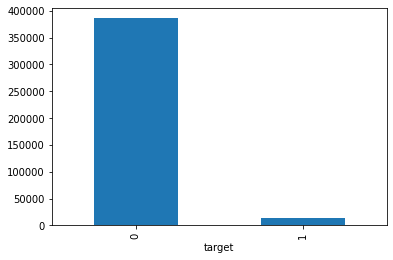

In [180]:
subdf.groupby('target').size().plot(kind='bar')

In [181]:
subdf.to_csv('submission.csv', index=False)